# Lorenzon Andrea	- Homework 5

### Exercises:
* CS 1.3 	
* CS 2.4 	
* CS 4.3 	
* BC 2.5 	
* DAAG 7.5 

# CS 1.3 	

Suppose that 
$$ Y \sim 
\left(
\begin{bmatrix}
    1  \\
   2 
\end{bmatrix},
\begin{bmatrix}
2 & 1 \\
1 & 2  
\end{bmatrix}
\right) $$

Find the conditional p.d.f. of $Y_1$ given that $Y_1 + Y_2 = 3$

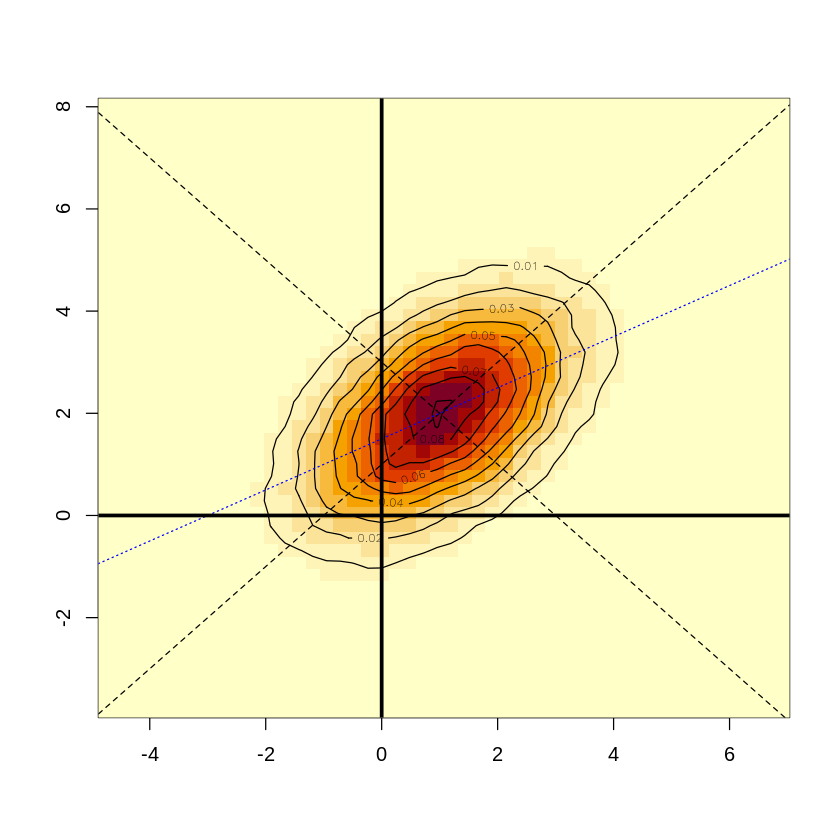

In [1]:
# First, a plot.

library(MASS)
mu    <- c(1,2)
Sigma <- matrix(c(2,1,1,2),2)

binv     <- mvrnorm(50000, mu=mu, Sigma=Sigma)
binv.kde <- kde2d(binv[,1], binv[,2], n=50)

image(binv.kde)
contour(binv.kde, add=T)

abline(coef=c(1,1),     lty=2) 
abline(coef=c(3,-1),    lty=2) 
abline(coef=c(3/2,1/2), lty=3, col="blue")  #regression line
abline (h=0, lwd=3) # assi
abline (v=0, lwd=3) #assi

**Solution:**




For Bayes th. :
$$ P_{Y_1} ( Y_1 | Y_1 + Y_2 = 3 ) = \frac{P_{Y_1+Y_2}(3|Y_1=y_1) P_{Y_1}(y_1)}{P_{Y_1+Y_2}(3)}$$$$\propto P_{Y_1+Y_2}(3|Y_1=y_1) P_{y_1}(y_1) $$

that will be Normal.
$$P_{Y_1}(y_1) \propto e^{-\frac{1}{2\sigma_1^2}(y_1-\mu_1)^2}$$

and $$P_{Y_1+Y_2}(3|Y_1=y_1) = P_{y_1+y_2}(3|Y_1=y_1) = P_{Y_2}(3-Y_1 | Y = y_1)$$
$$Y_2 | Y_1 = y_1 \approx Normal ( \mu_2 + \frac{\sigma_{12}}{\sigma_1^2} , \sigma_2^2 - \frac{\sigma_{12}^2}{\sigma_1^2})$$$$P_{Y_2} (3-Y_1| Y=y_1) \propto e^ {-\frac{1}{2(\sigma_2^2 - \frac{\sigma_{12}^2}{\sigma_1^2})}\left[3 - y_1 - \left( \mu_2 + \frac{\sigma_{12}}{\sigma_1^2}(y_1-\mu_1) \right)\right]^2}$$

That, by substitution and semplification, describes $\propto exp\left( - \frac{1}{2 \frac{1}{2}} (y_1 -1)^2 \right)$

so $$ (Y_1 | Y_1 + Y_2 = 3) \sim Normal(1,\frac{1}{2})$$


# CS 2.4

Using R, write a function to evaluate the log-likelihood of $\theta_t$ for example 4 in section 2.1. (Hint: see `?dexp`). Plot log likelihood against $\theta_t$ over a suitable range and making use of (2.4) and the definition of a confidence interval, find a 95% confidence interval for $\theta_t$ (`pchisq` is also useful).

MLE for exponential distributions is $\hat\lambda=\frac{1}{\bar x}$.

*As extra work, to satify my personal curiosity and to compare the difference brought by taking into consideration the censored data vs. aggregating all the data, both estimates are computed.*

In [2]:
# a range of theta
theta <- seq (0.00000001, 0.01, 0.00001)

# data from book, divided by censored and uncensored
xx_uncens = c (28, 32, 49, 84, 357)
xx_cens = c(933,1078,1183,1560,2114,2144)
xx = c(xx_uncens, xx_cens)

# mean, and Theta MLE
cat("mean: " , mean(xx), "\n") 
cat("MLE : " , 1/mean(xx)) #MLE

# length for censored and uncensored data
n_uncens = length(xx_uncens)
n_cens = length(xx_cens)
n= length(xx)

# log likelihood of exponential
LLexp <- function (theta) {
     log(theta) * n -theta*sum(xx)
}

# log likelihood with censored data  <--------
LLexp_cens <- function (theta) {
     log(theta) * n_uncens -theta*sum(xx_uncens) -theta*sum(xx_cens)
}

# likelihood, to compare peaks
Lexp <- function (theta) {
    theta^n * exp(-theta*sum(xx))
}


mean:  869.2727 
MLE :  0.001150387

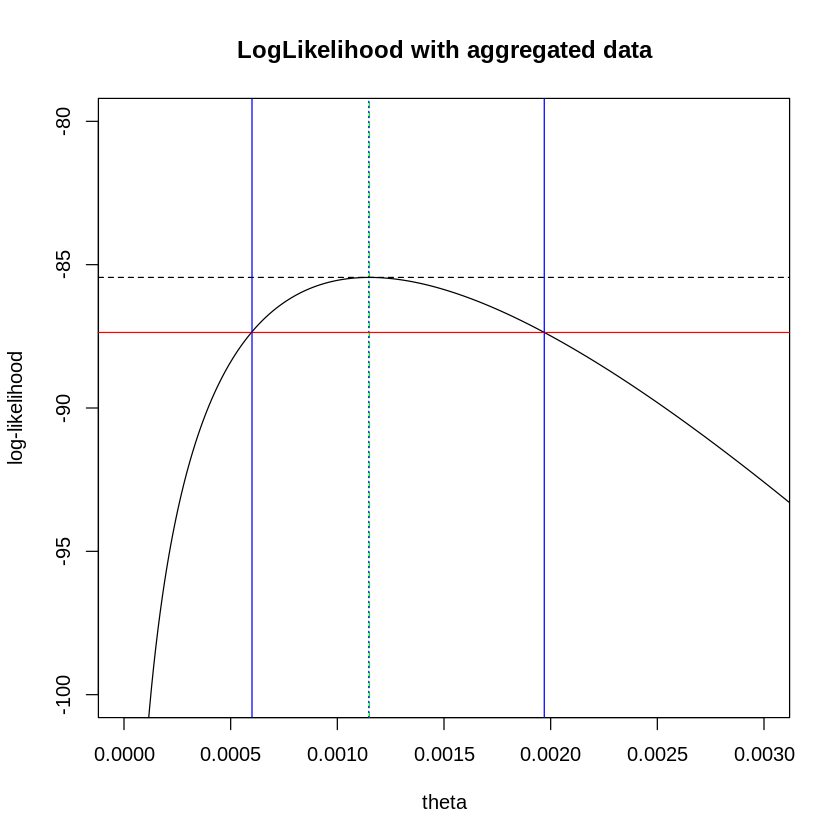

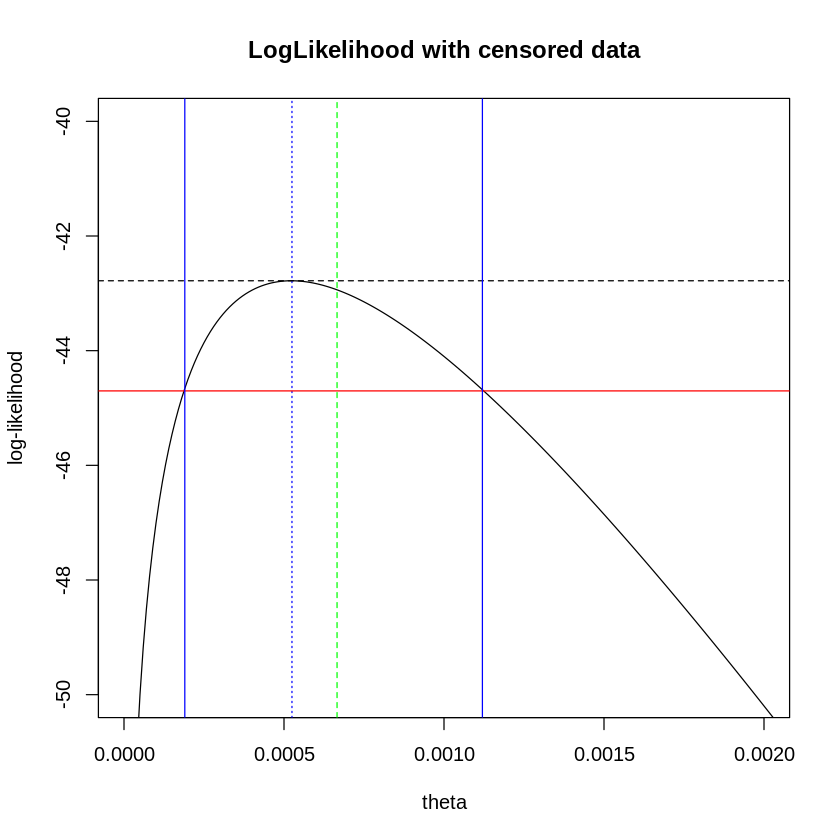

In [3]:
# warnings are generate during opt(). Most of them involve:
# “NaNs produced”Warning message in log(theta)
# to avoid a long list of warnings, I suppressed them for opt() functions.
# To take them into consideration, MLE results has been checked, and they are ok.

# plot loglikelihood with CI
negLLexp      <- function (t) { - LLexp(t)} #negative log lik target function
negLLexp_cens <- function (t) { - LLexp_cens(t)} #negative log lik target function, censored data version

# opt(), to find ML, with suppressed warnings
options(warn=-1)
opt      <- optim(1,negLLexp)       #aggregated data version
opt_cens <- optim(1,negLLexp_cens)  #censored data version
options(warn=0)

# aggregated data plot
plot(theta,sapply(theta, LLexp), type="l", xlim=c(0,0.003), ylim=c(-100,-80), ylab = "log-likelihood", main= "LogLikelihood with aggregated data")
abline(v=1/mean(xx), lty=2, col="green")  #MLE
abline(v=opt$par, lty=3, col="blue") #perfect superposition with MLE
abline(h=-opt$value, lty=2) #max L
abline(h=-opt$value-qchisq(.95,1)/2, lty=1, col="red")  #95% CI for ML

#aggregated data theta CI
reasonable_theta_values <- theta[LLexp(theta)>=(-opt$value-qchisq(.95,1)/2)]

#in blue, 95% CI for ML thetas
abline(v=min(reasonable_theta_values), col="blue")
abline(v=max(reasonable_theta_values), col="blue")


# censored data plot
plot(theta,sapply(theta, LLexp_cens), type="l", ylab = "log-likelihood",  xlim = c(0,0.002), ylim=c(-50,-40), main= "LogLikelihood with censored data")
abline(v=1/mean(xx_cens), lty=2, col="green")  #MLE
abline(v=opt_cens$par, lty=3, col="blue") # no perfect superposition with MLE anymore
abline(h=-opt_cens$value, lty=2) #max L
abline(h=-opt_cens$value-qchisq(.95,1)/2, lty=1, col="red")  #95% CI for ML

#censored data theta CI
reasonable_theta_values_cens <- theta[LLexp_cens(theta)>=(-opt_cens$value-qchisq(.95,1)/2)]

#in blue, 95% CI for ML thetas
abline(v=min(reasonable_theta_values_cens), col="blue")
abline(v=max(reasonable_theta_values_cens), col="blue")


In [4]:
# confidence interval for theta

cat ("95% CI for theta (aggregated data): ")
cat(min(reasonable_theta_values))
cat(" - ")
cat(max(reasonable_theta_values))
cat("\n")

cat ("95% CI for theta (censored data:)   ")
cat(min(reasonable_theta_values_cens))
cat(" - ")
cat(max(reasonable_theta_values_cens))

95% CI for theta (aggregated data): 0.00060001 - 0.00197001
95% CI for theta (censored data:)   0.00019001 - 0.00112001

# CS 4.3

Random variables $X$ and $Y$ have a joint p.d.f. $f(x,y)= k x^\alpha y^\beta , 0 \le x\le 1, 0 \le y\le 1$.

Assume that you have $n$ independent pairs of observations $(x_i, y_i)$:

a) evaluate $k$ in terms of $\alpha$ and $\beta$.
$$ k \int_0^1 \int_o^1 x^\alpha y^\beta dx dy = \frac{k}{(\alpha+1)(\beta+1)}=1$$

so
$$ k = (\alpha+1)(\beta+1)$$

b) find the ML estimators of $\alpha$ and $\beta$
$$MLE(\theta) = n (log(\alpha+1) + log(\beta+1)) + \sum{\alpha log(x_i)} + \sum{\beta log(y_i)}$$$$ \frac{\partial l}{\partial \alpha} = \frac{n}{\alpha+1} + \sum{log(x_i)}$$

and similarly $$ \frac{\partial l}{\partial \beta} = \frac{n}{\beta+1} + \sum{log(y_i)}$$

that gives:
$$\hat\alpha = \frac{-n}{\sum log(x_i)}-1 \hat\beta = \frac{-n}{\sum log(y_i)}-1 $$

c) find the appropriate variances of $\hat\alpha$ and $\hat\beta$
$$\frac{\partial^2l}{\partial\beta^2}=\frac{-n}{(\beta+1)^2}$$$$\frac{\partial^2l}{\partial\alpha^2}=\frac{-n}{(\alpha+1)^2}$$$$\frac{\partial^2l}{\partial\alpha\partial\beta}=0$$

hence:
$$var(\hat\alpha)\approx\frac{(\hat\alpha+1)^2}{n}$$$$var(\hat\beta)\approx\frac{(\hat\beta+1)^2}{n}$$


# BC 2.5

**Estimate a normal mean with discrete prior.**

Suppose you are interested in estimating the total average snowfall per year $\mu$ (in inches) for a large city on the East Coast of the United States. Assume individual yearly snow totals $y_1, ... , y_n$ are collected from a population that is assumed to be normally distributed with mean $\mu$ and known standard deviation $\sigma$ = 10 inches.

a) before collecting data, suppose you believe that the mean snowfall $\mu$ can be the values 20,30,40,50,60,70 inches with the following probabilities:

    mu    |  20    30    40    50    60    70
    prior |  .1    .15   .25   .25   .15   .1
    
Place the $\mu$ probabilities in the vector `mu` and the associated prior probabilities in the vector `prior`.


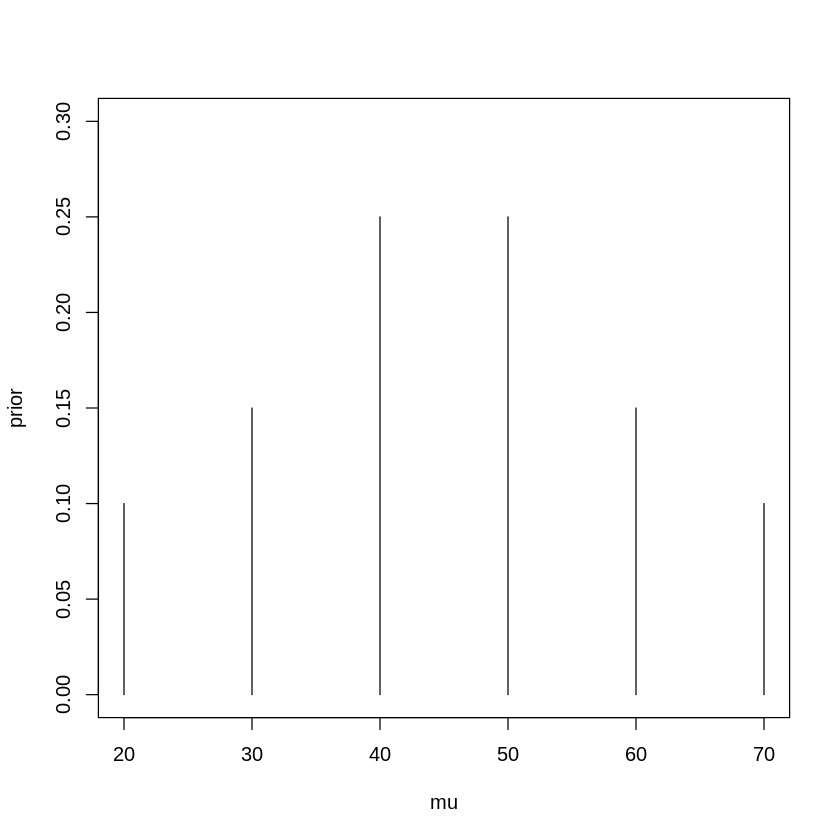

In [5]:
mu <- c(20,30,40,50,60,70)
prior <- c(.1,.15,.25,.25,.15,.1)
sigma <- 10
plot(mu,prior, type="h", ylim=c(0,0.3))

b) Suppose you observe the yearly snowfall totals 38.6, 42.4, 57.5, 40.5, 51.7, 67.1, 33.4, 60.9, 64.1, 40.1, 40.7. Enter these data in the vector `y` and compute the sample mean `ybar`.

In [6]:
y <- c(38.6, 42.4, 57.5, 40.5, 51.7, 67.1, 33.4, 60.9, 64.1, 40.1, 40.7, 6.4)
ybar <- mean(y)
n <- length(y)
cat("y_bar = ", ybar)

y_bar =  45.28333

c) In this problem, the likelihood function is given by  $$ L(\mu) = exp (-\frac{n}{2\sigma}(\mu-\bar y)^2)$$ where $\bar y$ is the sample mean. Compute the likelihood of the list of values in `mu` and place the likelihood values in the vector `like`. 

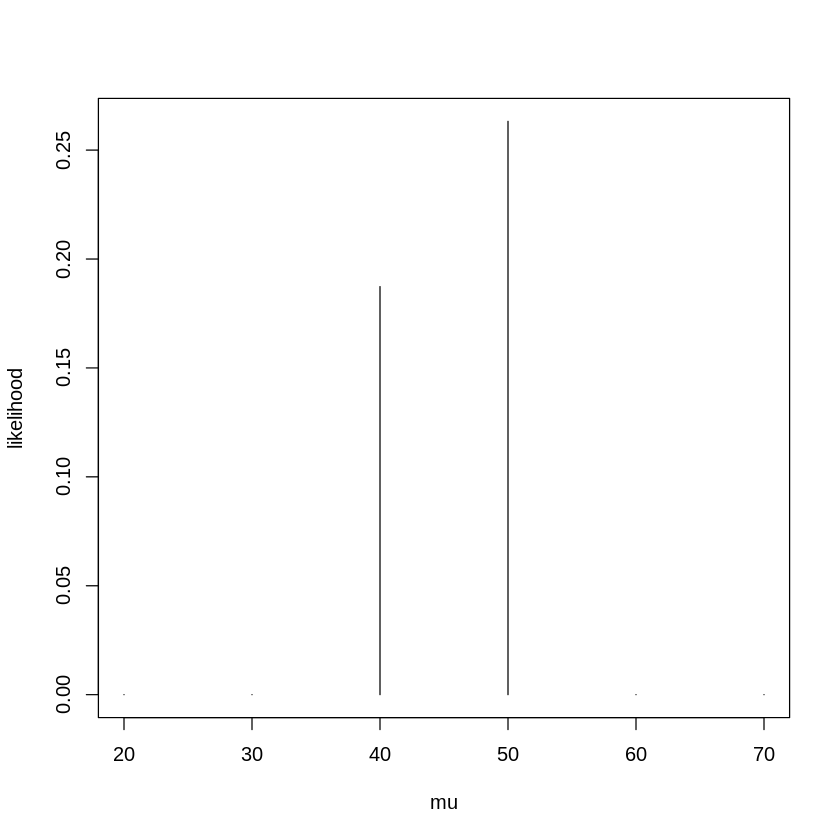

In [7]:
norm_likelihood <- function (m) {                #drop normalization factor
    exp (- n/(2*sigma^2) * (m - ybar)^2)
}

likelihood <- Vectorize(norm_likelihood)(mu)

plot(mu,likelihood, type="h")

d) one can compute the posterior probability for $\mu$ using the formula `post=prior*like/sum(prior*like)`. Compute the posterior probabilities of $\mu$ for this example.

In [8]:
post = prior * like / sum(prior*like)
plot(mu,post, type="h")

ERROR: Error in eval(expr, envir, enclos): object 'like' not found


e) Using the function `discint`, find an 80% probability interval for $\mu$.

In [9]:
library(LearnBayes)    # discint()


dist = cbind(mu,post)
pcontent = .8
discint(dist,pcontent)

ERROR: Error in library(LearnBayes): there is no package called ‘LearnBayes’


# DAAG 7.5 

The data frame `cuckoos` holds data on the lengths and breadths of eggs of cuckoos, found in
the nests of six different species of host birds. Fit models for the regression of length on breadth
that have:

A: a single line for all six species.
B: different parallel lines for the different host species.
C: separate lines for the separate host species.

Use the `anova()` function to print out the sequential analysis of variance table. Which of the
three models is preferred? Print out the diagnostic plots for this model. Do they show anything
worthy of note? Examine the output coefficients from this model carefully, and decide whether
the results seem grouped by host species. How might the results be summarized for reporting
purposes?


In [12]:
library(tidyverse)
library(broom)     # tidy
library(DAAG)      # cuckoos dataset

In [24]:
model1 <- lm(length ~ breadth,
             data = cuckoos)

model2 <- lm(length ~ breadth + species,
             data = cuckoos)

model3 <- lm(length ~ breadth * species,
             data = cuckoos)

tidy(model1)
tidy(model2)
tidy(model3)


anova(model1, model2)
anova(model2, model3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.341277,2.7164339,1.966283,5.161399e-02
breadth,1.033656,0.1640384,6.301303,5.276304e-09


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),9.51559484,3.0176538,3.15330901,2.067997e-03
breadth,0.81117031,0.1795100,4.51880377,1.538807e-05
speciesmeadow.pipit,-0.80125253,0.2560974,-3.12870204,2.233956e-03
speciespied.wagtail,-0.01323832,0.3145379,-0.04208816,9.665027e-01
speciesrobin,-0.30309647,0.3113665,-0.97343943,3.324141e-01
speciestree.pipit,0.04489996,0.3114329,0.14417218,8.856213e-01
specieswren,-1.23912478,0.3530027,-3.51024213,6.441082e-04


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.4466808,7.2532520,-0.06158352,0.951008326
breadth,1.4054262,0.4324570,3.24986343,0.001539788
speciesmeadow.pipit,13.0293648,9.0941335,1.43272195,0.154825578
speciespied.wagtail,16.7101080,10.9182321,1.53047744,0.128822480
speciesrobin,15.0520974,9.7159917,1.54920856,0.124257063
speciestree.pipit,6.8796220,10.9872124,0.62614808,0.532538954
specieswren,-7.3714260,13.3935025,-0.55037329,0.583199932
breadth:speciesmeadow.pipit,-0.8253396,0.5425439,-1.52124033,0.131122027
breadth:speciespied.wagtail,-1.0040178,0.6568640,-1.52850178,0.129311626


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
118,101.92331,NA,NA,NA,NA
113,79.11367,5,22.80964,6.515913,2.322006e-05


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
113,79.11367,NA,NA,NA,NA
108,74.97808,5,4.13559,1.191398,0.3182463


### Plots:

In [26]:
# recomputing the models for easier plotting
# one linear model ########################################################################
model1 <- cuckoos %>%
    lm (length ~ breadth, data=.) 

slope = model1$coefficients[["breadth"]]

# same slope, different intercept ########################################################################

model2 <- cuckoos %>%
    group_by(species) %>%
    do(fitSpec = lm (length - slope * breadth ~ 1, data=.))  # fit just the intercepts

# different slope, different intercept ########################################################################
model3 <- cuckoos %>%
    group_by(species) %>%
    do(fitSpec2 = lm (length ~ breadth, data=.))



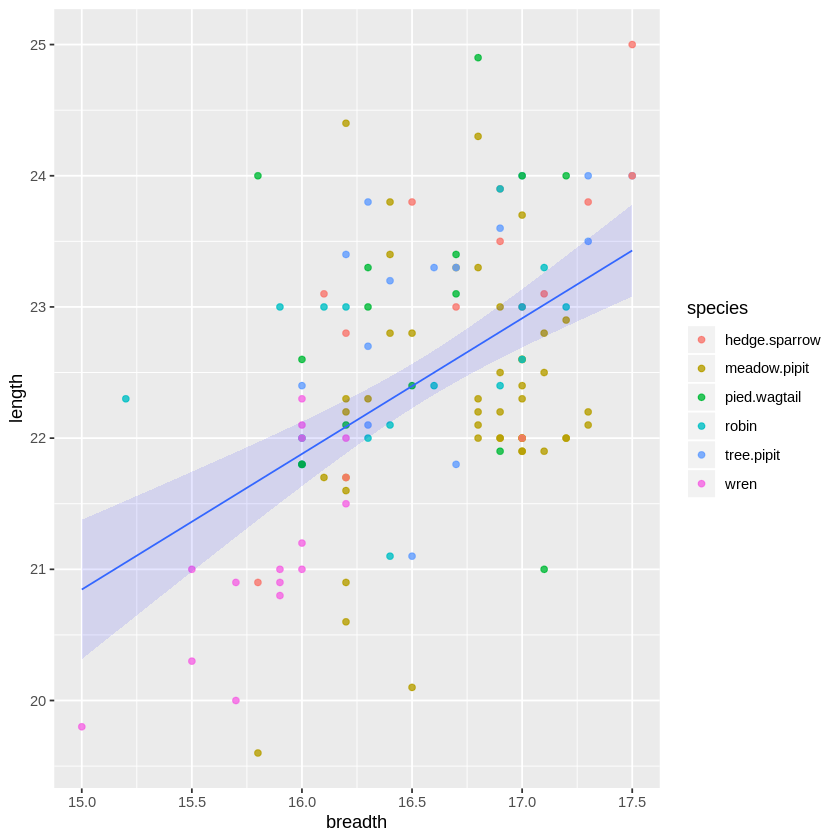

In [27]:
# A: a single line for all six species

ggplot(data = cuckoos, aes(x = breadth, y =length)) +
    geom_point(alpha = 0.8, aes(color = species)) +
    stat_smooth(method= "lm", fill="blue",  size=0.5, alpha=0.1)

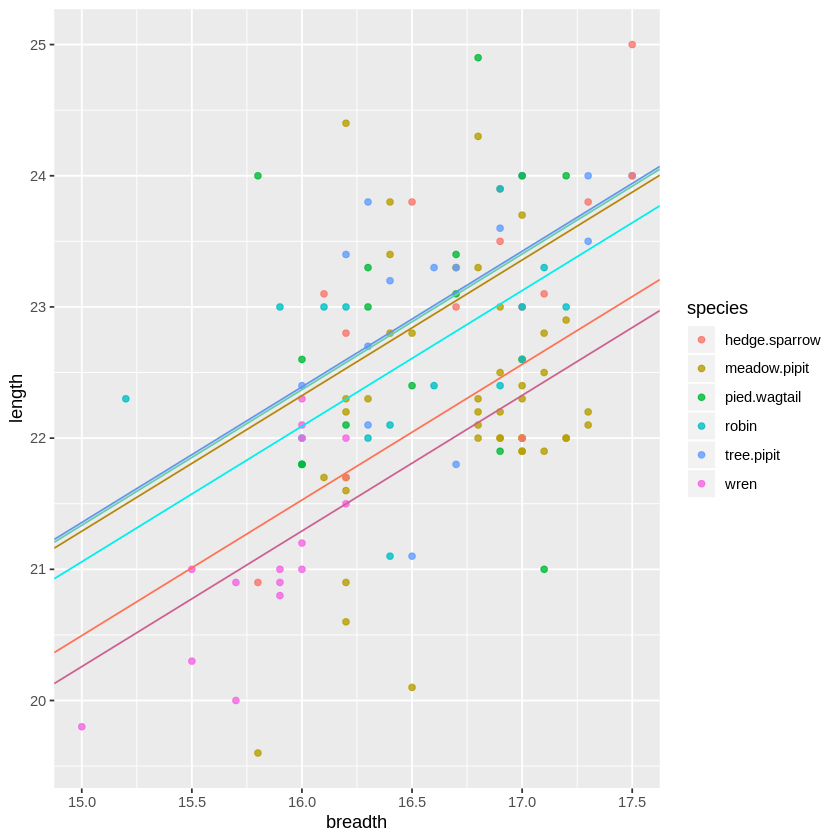

In [28]:
# B: different intercepts

ggplot(data = cuckoos, aes(x = breadth, y =length)) +
    geom_point(alpha = 0.8, aes(color = species)) +
    geom_abline(slope = slope, intercept = tidy(model2, fitSpec)$estimate[1], color="darkgoldenrod")  +
    geom_abline(slope = slope, intercept = tidy(model2, fitSpec)$estimate[2], color="coral1")         +
    geom_abline(slope = slope, intercept = tidy(model2, fitSpec)$estimate[3], color="aquamarine3")    +
    geom_abline(slope = slope, intercept = tidy(model2, fitSpec)$estimate[4], color="cyan2")          +
    geom_abline(slope = slope, intercept = tidy(model2, fitSpec)$estimate[5], color="cornflowerblue") +
    geom_abline(slope = slope, intercept = tidy(model2, fitSpec)$estimate[6], color="hotpink3")



Warning message in models[specie] <- model:
“number of items to replace is not a multiple of replacement length”Warning message in models[specie] <- model:
“number of items to replace is not a multiple of replacement length”Warning message in models[specie] <- model:
“number of items to replace is not a multiple of replacement length”Warning message in models[specie] <- model:
“number of items to replace is not a multiple of replacement length”Warning message in models[specie] <- model:
“number of items to replace is not a multiple of replacement length”Warning message in models[specie] <- model:
“number of items to replace is not a multiple of replacement length”

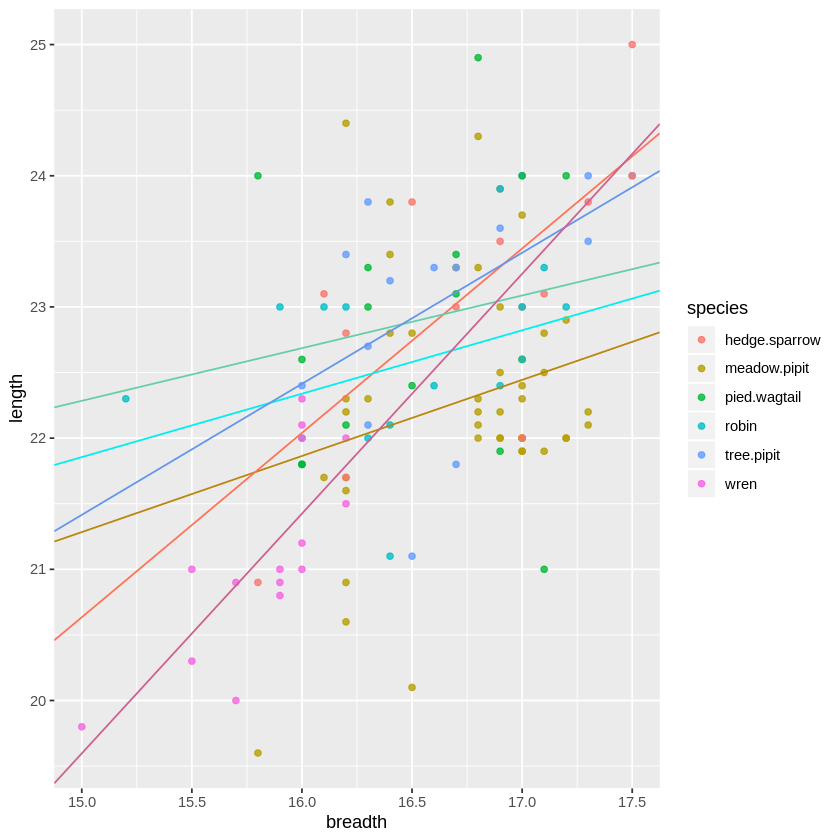

In [29]:
# C: separate line for the separate host species

#get all species
species_labels = unique(cuckoos$species)

models = list()

for (specie in species_labels){
    data  <- cuckoos %>% filter(species==specie)
    model <- lm (length ~ breadth, data = data)
    models[specie] = model
    }

ggplot(data = cuckoos, aes(x = breadth, y =length)) +
    geom_point(alpha = 0.8, aes(color = species)) +
    geom_abline(slope = models$meadow.pipit[2],  intercept = models$meadow.pipit[1],  color="darkgoldenrod") +
    geom_abline(slope = models$hedge.sparrow[2], intercept = models$hedge.sparrow[1], color="coral1") +
    geom_abline(slope = models$pied.wagtail[2],  intercept = models$pied.wagtail[1],  color="aquamarine3") +
    geom_abline(slope = models$robin[2],         intercept = models$robin[1],         color="cyan2") +
    geom_abline(slope = models$tree.pipit[2],    intercept = models$tree.pipit[1],    color="cornflowerblue") +
    geom_abline(slope = models$wren[2],          intercept = models$wren[1],          color="hotpink3")

# warnings are expected.

## Diagnostic plots


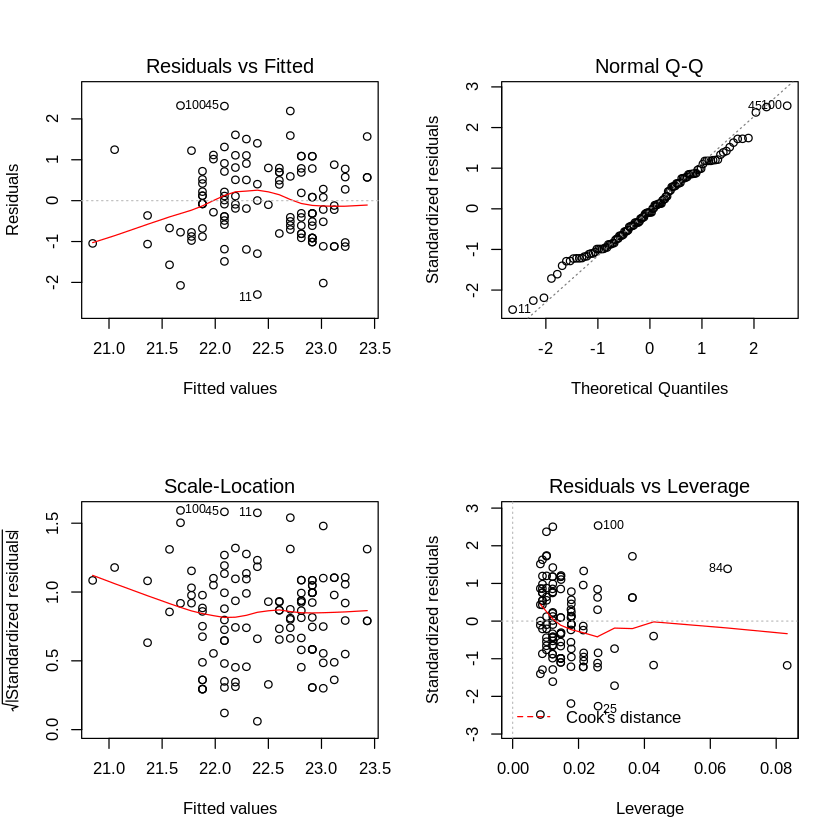

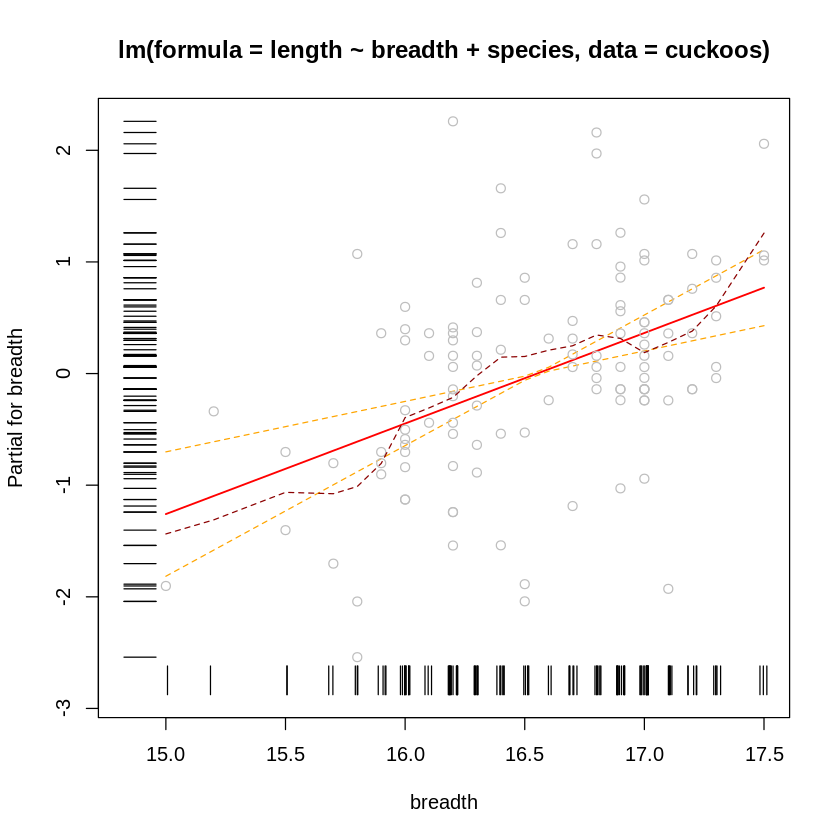

Warning message in termplot(model3, partial.resid = TRUE, se = TRUE, main = TRUE, :
“'model' appears to involve interactions: see the help page”

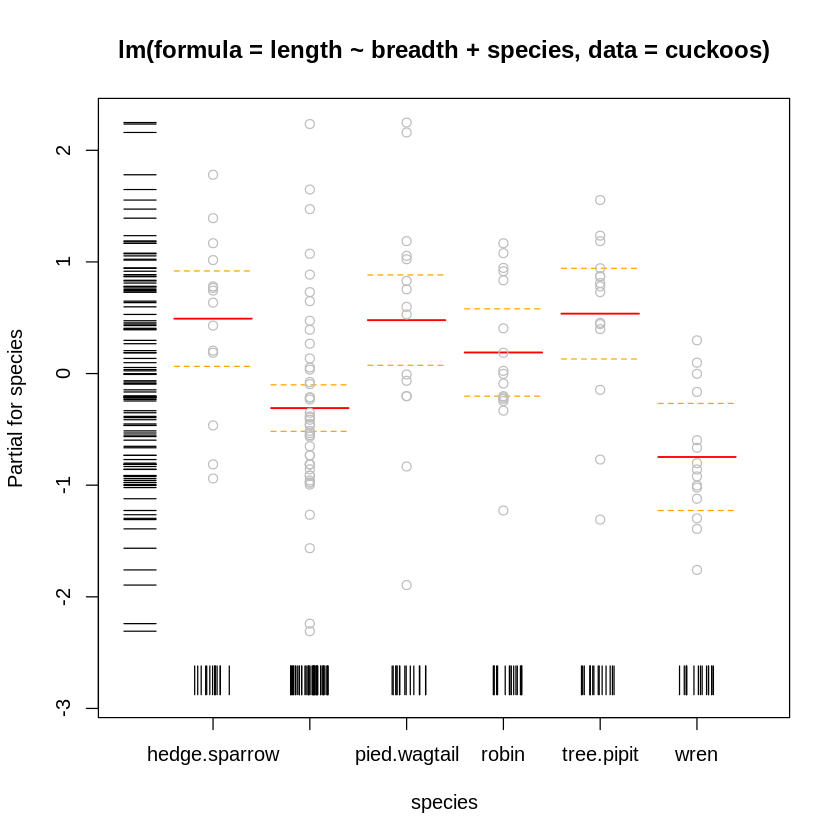

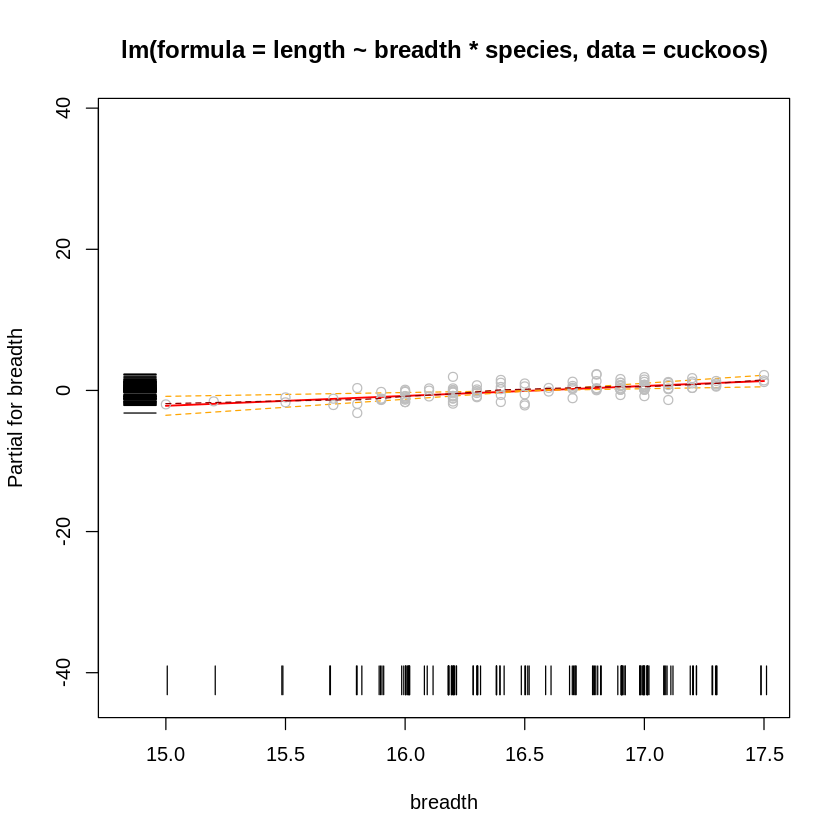

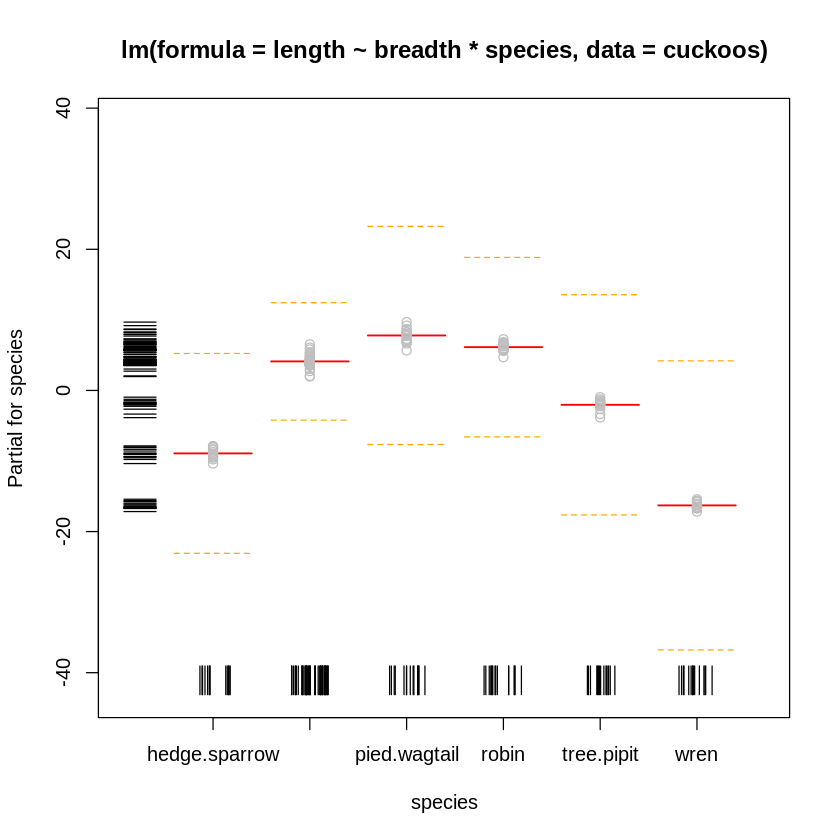

In [52]:
model1 <- lm(length ~ breadth,
             data = cuckoos)

model2 <- lm(length ~ breadth + species,
             data = cuckoos)

model3 <- lm(length ~ breadth * species,
             data = cuckoos)



par(mfrow = c(2,2))
plot(model1)


par(mfrow = c(1,1))
termplot(model2, partial.resid = TRUE, se = TRUE, main = TRUE, rug= TRUE,  smooth = panel.smooth, span.smth = 1/4)


par(mfrow = c(1,1))
termplot(model3, partial.resid = TRUE, se = TRUE, main = TRUE, rug= TRUE,  smooth = panel.smooth, span.smth = 1/4)

From diagnostic plots we can see a distinct improvement of model 3 against both model 1 and 2, when residuals are more strict and well clustered.